# Training

Zoals eerder vermeld, zijn er twee basis stappen in machine learning:
1. Model training
2. Model inference

Op het moment dat we een model hebben gedefiniëerd, willen we de parameters aan de hand van de beschikbare data schatten. Dat doen we door het gepaste leer-algorithme toe te passen.
Dit noemen we **model training**.  
  
Een **getrained model is een model waarvan de parameters geschat zijn met behulp van een wel bepaalde traing dataset en optimalisatie-algorithme**.

Pas als het model getrained is, kan het gebruikt worden om effectief patroonherkenning te doen op _nieuwe data_. Die stap heet _model inference_.

:::{warning}
Het is niet omdat we een getraind model hebben, dat dit automatisch betekent dat het in staat is om de patronen te herkennen waar we naar op zoek zijn!  
**Onthou**: _All models are wrong, some are useful_.
:::

### Optimalisatie-algorithme
Een optimalisatie-algorithme heeft als doel om de optimale waarde voor een parameter te vinden, gegeven ons model (van de werkelijkheid) en de beschikbare data.
_Bij het uitvoeren van het optimalisatie-algorithme gebeurt dus het eigenlijke leren in ML_. Ook hier zijn vaak verschillende keuzes aan de orde.
Daarbij moeten we (a) effectiviteit om juiste parameterwaarden te vinden en (b) computationele efficientie tegen elkaar afgewegen.

:::{note} 🌍
:icon: false
:class: simple 
In ons eennvoudige airco voorbeeld kozen we voor het sample gemiddelde.
:::

De keuze van het algorithme hangt samen met het type model (lineair, neuraal netwerk, random forest, enz.) en, hoewel er voortdurend verder onderzoek gebeurd naar nieuwe technieken, zijn voor veel modellen geijkte keuzes beschikbaar. 
Zoals we in de uitgebreidere voorbeelden ook zullen zien, zijn leer- of optimalisatiealgorithmes vaak zeer complex (denk alvast aan het [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) algoritme bij neurale netwerken en uitgebreid aan bod komt in de cursus Mathematical Foundations).  
In die complexiteit zit vaak ook nog het feit dat er verdere keuzes moeten gemaakt worden met betrekking tot de _specifieke configuratie van het algorithme zelf_.
Bij iteratieve methodes, bijvoorbeeld, waarin er stapsgewijs gezocht wordt naar een optimale waarde, moeten we een keuze maken over de grootte van die stappen (de zogenaamde _learning rate_).  
Die configuratie kan een grote impact hebben op de kwaliteit van het uiteindelijke resultaat. Het is vaak op voorhand ook niet duidelijk welke de beste configuratie voor het optimalisatie algorithme is, gegeven de specifieke situatie. Daarom wordt ook daar vaak op een (al dan niet principiële manier) iteratief gewerkt om tot optimale waarden te komen.  
**De numerieke configuratie parameters van een optimalisatiealgorithme worden _hyper parameters_ genoemd. Het process waarbij de hyper parameters worden geoptimaliseerd heeft _hyper parameter tuning_.**  
  
:::{note} 🌍
:icon: false
:class: simple 
Veronder stel dat we voor ons eenvoudigste model voor de airco temperatuur drempelwaarde het volgende naïeve algorithme zouden gebruiken in plaats van het sample gemiddelde:
- We starten met een berekende gok, bv. $\hat{b_0} = 18$
- Van zodra de eerste observatie gemaakt wordt, bv. $d_0 = 25$, willen we onze initiële schatting updaten, maar we willen uiteraard niet gewoon de geobserveerde waarde overnemen.
- We kiezen voor de techniek van _expontial smoothing_ waarbij we op ieder moment een gewogen gemiddelde nemen tussen onze schatting van dat moment $\hat{b_i}$ en de nieuwe observatie $d_i$.
$$
\hat{b_{i+1}} = \hat{b_i}*(1-\lambda + d_i*(\lambda) \\
0 > \lambda > 1
$$

Hieronder visualiseren we dit voor verschillende waarden voor $\hat{b_0}$ en _learning rate_ $\lambda$.  
Merk op dat er een grote variatie is in de kwaliteit van de uiteindelijke schatting!
:::

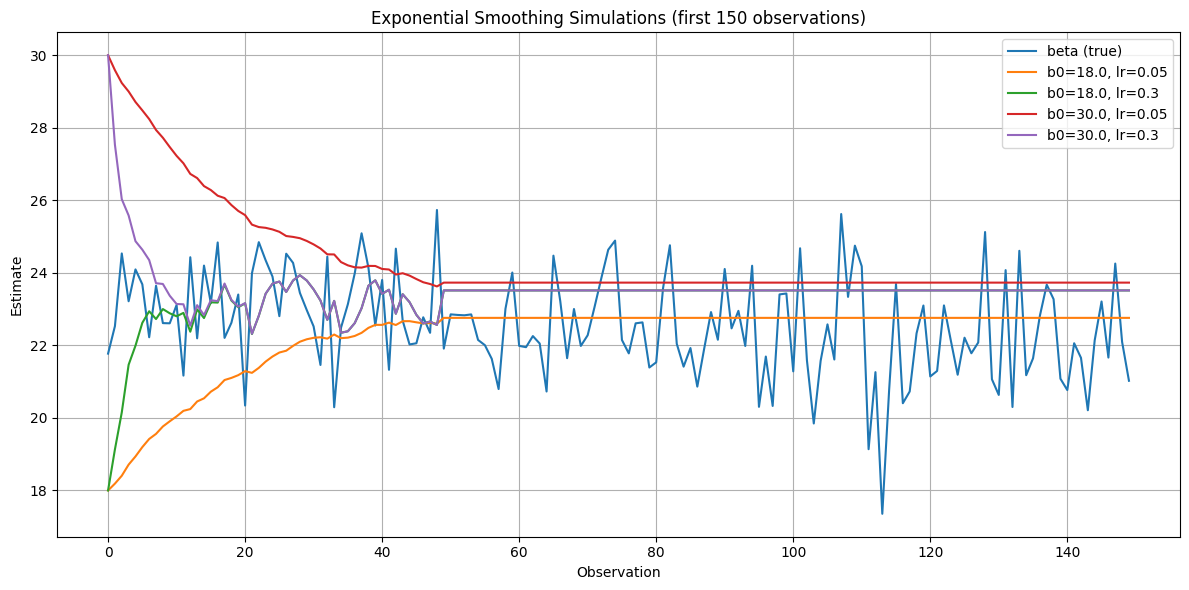

In [ ]:
import matplotlib.pyplot as plt

from ml_courses.sim.airco import AircoSimulator

# Get the simulated preferences data
ac = AircoSimulator(seed=123)
df = ac.get_data()
y = df.beta.values

# Set the hyperparameters
b_0 = [18.0, 30.0]  # Initial estimate
lr = [0.05, 0.3]  # Learning rate
max_iter = 50  # Number of iterations

# Run the exponential smoothing algorithm for different configurations
n_sim = 0
for _b_0 in b_0:
    for _lr in lr:
        estimates = [_b_0]
        for i, d in enumerate(y):
            # stopping rule
            if i + 2 > max_iter:
                break
            _b_i = estimates[-1] * (1 - _lr) + float(d) * _lr
            estimates.append(_b_i)
        # If we stopped early, fill the rest with the last estimate
        estimates = estimates + [estimates[-1]] * (len(y) - max_iter)
        df[f"sim{n_sim}"] = estimates
        n_sim += 1

# Visualize the results
# Create labels for the different simulations
sim_labels = [
    f"b0={b_0[0]}, lr={lr[0]}",
    f"b0={b_0[0]}, lr={lr[1]}",
    f"b0={b_0[1]}, lr={lr[0]}",
    f"b0={b_0[1]}, lr={lr[1]}",
]

# Plot the true beta and the simulations
plt.figure(figsize=(12, 6))
plt.plot(df["beta"].iloc[:150], label="beta (true)")
for i, label in enumerate(sim_labels):
    plt.plot(df[f"sim{i}"].iloc[:150], label=label)
plt.xlabel("Observation")
plt.ylabel("Estimate")
plt.title("Exponential Smoothing Simulations (first 150 observations)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

:::{note} 🌍
:icon: false
:class: simple
In dit algorithme spreken we dus over 2 **hyper parameters**: $\hat{b_0}$ en $\alpha$. De keuze daarvan heeft duidelijk drastische gevolgen voor de convergentie van het leerprocess.
Als we op een bepaald moment de schatting van de model parameter $\hat{b}$ willen vastzetten (zgn. _parameter freezing_), kunnen het algorithme ook uitbreiden met een zgn. _stopping rule_.
Die regel bepaald de voorwaarde om de updates te stoppen. Dat kan heel simpel door toevoeging van een hyper parameter die het maximum aantal updates bepaalt of door bijvoorbeeld een limiet te zetten op de _online_ update variantie (bv. [](https://doi.org/10.2307%2F1266577))
:::

### "Loss" functie


### Supervisie
